In [1]:
# Automatically reload custom code modules when there are changes:
%load_ext autoreload
%autoreload 2


In [2]:
# Adjust relative path so that the notebook can find the code modules:
import sys
sys.path.append('code/dqn/')
sys.path.append('code/')


In [3]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib notebook


In [4]:
# Import code modules:
from structures import RingRoad
from animations import Animation
from learning import Game


In [5]:
# Hide warnings about safe distance violation (still in development):
import warnings
warnings.filterwarnings("ignore", category=UserWarning)


<IPython.core.display.Javascript object>


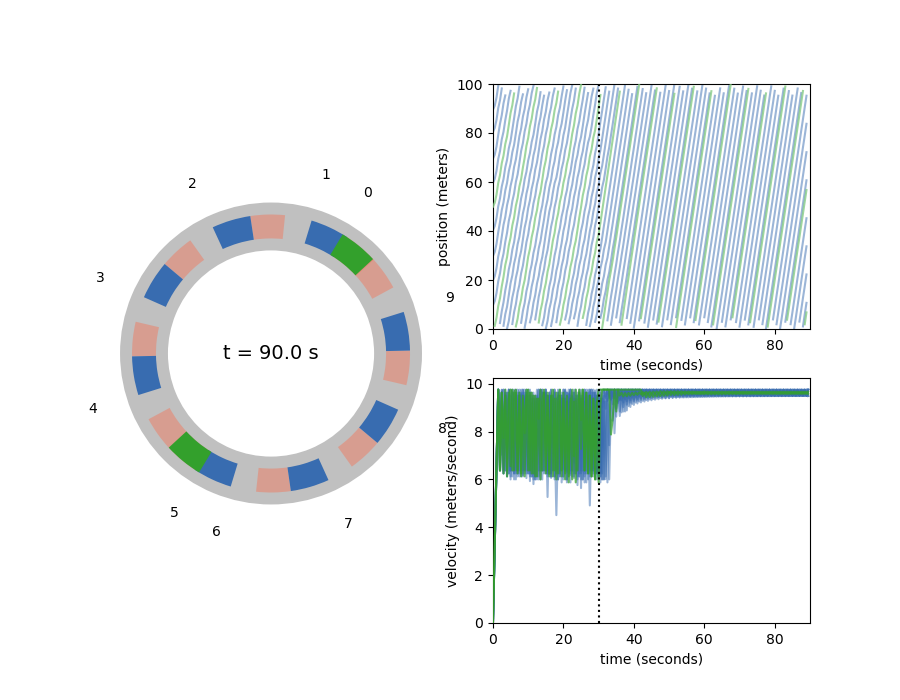

In [6]:
# Define a ring road environment:
road_params = {
    'num_avs' : 2,
    'av_even_spacing' : True,
    'num_vehicles' : 10,  # The vechicles at index 0 is an A.V.
    'ring_length' : 100.0,  # The road is a cicle.
    'starting_noise' : 1.0,  # Uniformly add noise to starting positions.
    'temporal_res' : 0.5,  # Set the size of simulation steps (seconds).
    'av_activate' : 30,  # Set when the PID controller is activated.
    'seed' : 286,  # Set a random seed.
}
road = RingRoad(**road_params)

# Plot initial conditions:
#fig,ax = road.plot_ring(step=0, draw_cars_to_scale=True, draw_safety_buffer=True)

# Run the simulation for set number of time steps:
total_time = 90  # In seconds.
total_steps = int(np.ceil(total_time/road.dt))
road.run(steps=total_steps)

# Show step of simulation:
step = road.step
fig, axs = road.plot_dashboard(
    step=step, total_steps=total_steps,
    draw_cars_to_scale=True, draw_safety_buffer=True, label_step=True, label_cars=True,
)


<IPython.core.display.Javascript object>


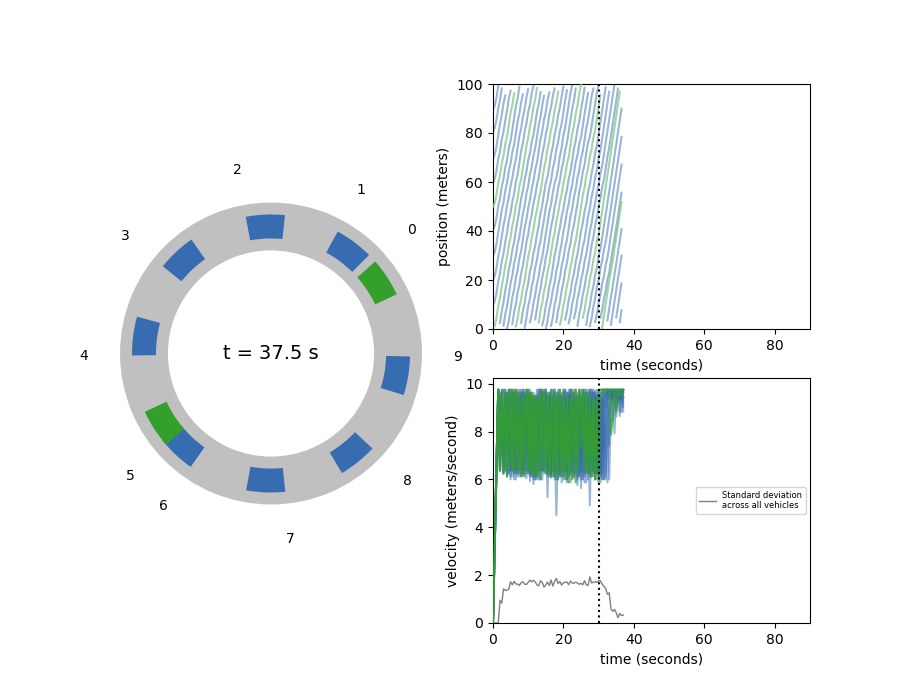

Saved : outputs/learning_goal.gif .


In [7]:
# Build animation:
anim = Animation(road, speedup=5.0, interval=5)
anim.animate_dashboard(draw_cars_to_scale=True, draw_safety_buffer=False, show_sigma=True)

# Show animation:
anim.show()

# Save animation as GIF (may take a few minutes -- pauses preview above):
anim.save_gif(filepath="outputs/learning_goal.gif", overwrite=True)


In [8]:
# Deactivate interactive plotting mode (ends preview above):
# anim.stop()


In [9]:
# Define the same ring road but with learning mode:
road_params['learning_mode'] = True
road_params['av_activate'] = 0
road = RingRoad(**road_params)

# Initialize a game with this road:
game = Game(
    road = road,
    agent_commands = [-1.0, -0.1, 0.0, 0.1, 1.0],
    past_steps = 3,
    max_seconds = None,
)


In [10]:
print("observation_space shape:",game.observation_space.shape)
print("action_space size:",game.action_space.n)


observation_space shape: (30,)
action_space size: 25


In [11]:
print(game.action_space())


[(-1.0, -1.0), (-1.0, -0.1), (-1.0, 0.0), (-1.0, 0.1), (-1.0, 1.0), (-0.1, -1.0), (-0.1, -0.1), (-0.1, 0.0), (-0.1, 0.1), (-0.1, 1.0), (0.0, -1.0), (0.0, -0.1), (0.0, 0.0), (0.0, 0.1), (0.0, 1.0), (0.1, -1.0), (0.1, -0.1), (0.1, 0.0), (0.1, 0.1), (0.1, 1.0), (1.0, -1.0), (1.0, -0.1), (1.0, 0.0), (1.0, 0.1), (1.0, 1.0)]


In [12]:
# Get command tuple at given index:
game.action_space.decode(action_index=3)


(-1.0, 0.1)

In [13]:
# Get index of command tuple:
game.action_space.encode(agent_commands=(-1,0))


2

In [14]:
# Take a few steps:
next_observation, reward, done, info = game.step(3)
next_observation, reward, done, info = game.step(0)
next_observation


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.997586  , 0.09556007, 0.20421682, 0.30355373, 0.39869693,
       0.5010041 , 0.60154782, 0.70360835, 0.79516076, 0.89511765,
       0.997586  , 0.11181007, 0.22046682, 0.31980373, 0.41494693,
       0.5012541 , 0.61779782, 0.71985835, 0.81141076, 0.91136765])

In [15]:
display(game.road.get_vehicle_pos_table().tail())
display(game.road.get_vehicle_control_table().tail())


,vehicle_id,20,21,22,23,24,25,26,27,28,29
step,time,,,,,,,,,,
0,0.0,99.7586,9.556007,20.421682,30.355373,39.869693,50.10041,60.154782,70.360835,79.516076,89.511765
1,0.5,99.7586,11.181007,22.046682,31.980373,41.494693,50.12541,61.779782,71.985835,81.141076,91.136765
2,1.0,99.7586,14.431007,25.296682,35.230373,44.744693,50.12541,65.029782,75.235835,84.391076,94.386765


,vehicle_id,20,21,22,23,24,25,26,27,28,29
step,time,,,,,,,,,,
0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
1,0.5,-1.0,193.296177,184.510992,172.335467,189.066205,0.1,188.775755,153.580762,185.675693,189.248894
2,1.0,-1.0,128.296177,119.510992,107.335467,44.987388,-1.0,123.775755,88.580762,120.675693,44.132045
